In [1]:

%Data processing and plots for measuring OD with the ClampOD or TubeOD.
%Calibration, growth curve transformation, and reproducibility plots. 


In [2]:
%% load data and variables

%%for fixed e. coli calibrations, ClampOD
fixedData_Table = readtable('/Users/gcallander/Documents/GitHub/OD-Meter/ODcalibrations.csv');
fixedData = table2array(readtable('/Users/gcallander/Documents/GitHub/OD-Meter/ODcalibrations.csv'));
data2 = readtable('/Users/gcallander/Documents/GitHub/OD-Meter/ODcalibrations.csv');


%%for fixed e. coli calibrations, TubeOD
labJack2 = readtable('/Users/gcallander/Documents/GitHub/OD-Meter/LabjackOutput.csv');
labJack3 = readmatrix('/Users/gcallander/Documents/GitHub/OD-Meter/LabjackOutput.csv');

% Kluyveri (calibration and gc)
CKcalibrationTable = readtable('/Users/gcallander/Documents/GitHub/OD-Meter/C.Kluyveri_calibration.csv');
CKcalibration = table2array(CKcalibrationTable);

CKdataTable = readtable('/Users/gcallander/Documents/GitHub/OD-Meter/C.Kluyveri_data.csv');
CKdata = table2array(CKdataTable);

%Kivui (calibration and gc)
Tk_stir_DataTable = readtable('/Users/gcallander/Documents/GitHub/OD-Meter/Kivui_stir.csv');
Tk_stir = table2array(Tk_stir_DataTable);
% cal_tk = Tk_stir(1:10,1:6);

% Lactococcus (calibration and gc)
LactococcusDataTable = readtable('/Users/gcallander/Documents/GitHub/OD-Meter/lactococcus_GC.csv');
LactococcusCalibration = readtable('/Users/gcallander/Documents/GitHub/OD-Meter/lactococcus_calibration.csv');
lac_gc = table2array(LactococcusDataTable);
lac_cal = table2array(LactococcusCalibration);

% Methanococcus (calibration and gc)
MethanococcusDataTable = readtable('/Users/gcallander/Documents/GitHub/OD-Meter/methanococcus_GC.csv');
met_data = table2array(MethanococcusDataTable);

% reproducibility data
repDataTable = readtable('/Users/gcallander/Documents/GitHub/OD-Meter/Reproducibility.csv');
repData = table2array(repDataTable(:,[3:24]));
glassData = repData([8:14],1:18);

% E. coli (calibration and gc)
J_EC_DataTable = readtable('/Users/gcallander/Documents/GitHub/OD-Meter/JoergEcoliClampODData.csv');
J_EC_Data = table2array(J_EC_DataTable(13:end, [3,4]));%growth curve time and voltage, after innoculation

J_EC_ClampCalTable = readtable('/Users/gcallander/Documents/GitHub/OD-Meter/JoergEcoliClampODcalibration.csv');
J_EC_ClampCalOD = table2array(J_EC_ClampCalTable(2:end,[1,3,4])); %manual OD measurements and V
J_EC_ClampCalV = table2array(J_EC_ClampCalTable(2:end,6:7)); %Time and voltage during calibration

J_EC_ManualCalTable = readtable('/Users/gcallander/Documents/GitHub/OD-Meter/JoergEcoliManualOD.csv');
J_EC_ManualCal = table2array(J_EC_ManualCalTable); %Manual OD calibration during growth curve


%%
labels = ["15mL Falcon Tube" "15 mL Glass Tube" "25 mL Erlenmeyer flask" "125 mL Anaerobic flask" "100 mL Bottle" "500 mL Shake flask" "15 mL Glass Tube with tape" "Glass tube with tape diluted OD- 15 mL"];
list = [3,8,12,15, 18, 21, 23]; %columns with SP readings

pathlengths = [15.6 15.7 40.2 51.3 56.2 93.3 15.7];
pL_25 = 2.5./(pathlengths./10);

maxOD = [3 2.987 0.75 0.55 0.55 0.25 2]; %approximate linear limit

limitOD(:) = pathlengths(:).*(maxOD(:))./10;



Set 'VariableNamingRule' to 'preserve' to use the original column headers as table variable names.
Set 'VariableNamingRule' to 'preserve' to use the original column headers as table variable names.
Set 'VariableNamingRule' to 'preserve' to use the original column headers as table variable names.
Set 'VariableNamingRule' to 'preserve' to use the original column headers as table variable names.
Set 'VariableNamingRule' to 'preserve' to use the original column headers as table variable names.
Set 'VariableNamingRule' to 'preserve' to use the original column headers as table variable names.
Set 'VariableNamingRule' to 'preserve' to use the original column headers as table variable names.
Set 'VariableNamingRule' to 'preserve' to use the original column headers as table variable names.
Set 'VariableNamingRule' to 'preserve' to use the original column headers as table variable names.


In [3]:
%% Load colors for graphs
map = brewermap(9, 'PuOr');
map2 = brewermap(9,'OrRd');
map3 = brewermap(9,'RdBu');
map5 = brewermap(9,'RdYlGn');
map6 = brewermap(9,'Spectral');
map4 = brewermap(9,'PiYG');
map7 = brewermap(9, 'BrBG');
mapYlGnBu = brewermap(9, 'YlGnBu');
mapPuBuGn = brewermap(9, 'PuBuGn');
mapPuRd = brewermap(9, 'PuRd');

mapBlue = brewermap(9, 'Blues');
mapGreen = brewermap(9, 'Greens');
mapOrange = brewermap(9, 'Oranges');
mapRed = brewermap(9, 'Reds');
mapPurple = brewermap(9,'Purples');
mapGrey = brewermap(9,'Greys');

%Source: Charles (2021). cbrewer : colorbrewer schemes for Matlab 
%(https://www.mathworks.com/matlabcentral/fileexchange/34087-cbrewer-colorbrewer-schemes-for-matlab), 
%MATLAB Central File Exchange. Retrieved September 30, 2021.

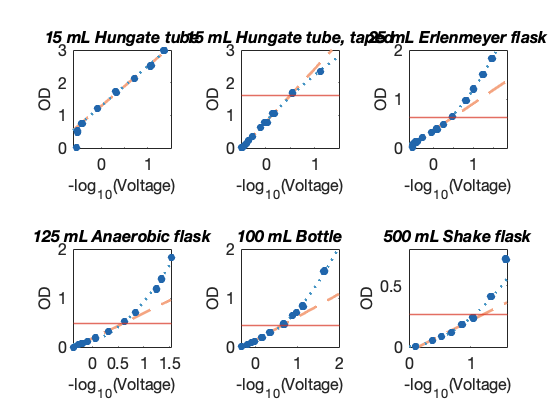

In [4]:
%% Fit voltage to OD and plot
%% main text, figure 3

fg = figure('Name','Calibrating Clamp OD - different bottles');
tiledlayout(2,3, 'TileSpacing','compact')
set(gcf,'color','w');
map = map3;
set(0, 'DefaultAxesColorOrder', mapPuBuGn([9,3,1],:))


for i = 2:length(list)
    %%Testing 1st and 2nd order fits
    a = list(i);
    SP(:,i) = fixedData(:,a);
    V(:,i) = fixedData(:, a+1);
    %     res_fixed1(:,i) = fixedData(:,a);
    
    %calculate coefficients for trendlines, taking out maxxed out values
    %for 15 mL tubes
    iax = isnan(fixedData(:,a));
    iay = isnan(fixedData(:, a+1));
    if i <= 2
        c = fixedData(:,a+2) < 0.06;
    elseif i == 3
        c = fixedData(:,a) < 0.05; %maxxed-out sensor values
    end
    
    f = SP(:,i) <= maxOD(i); %linear region
    
    if i <= 3
        b = (iax + iay + c) < 1; % values that are not maxxed
    else
        b = (iax + iay) <1;
    end
    e = (iax + iay) > 0 ; % values that are nan
    d = (iax + iay) < 1; %just takes out values without SP values
    
    %     res_fixed1 = zeros(sum(b),length(list));
    b_list(:,i) = b;
    e_list(:,i) = e;
    d_list(:,i) = d;
    f_list(:,i) = f;
    V_range(:,i) = logical(b.*f);
    V_min(1,i) = min(V(V_range(:,i),i));
    V_max(2,i) = max(V(V_range(:,i),i));

    
    [fixed_curve1, fixed_goodness1, fixed_output1]= fit(-log10(V(logical(b.*f),i)), SP(logical(b.*f),i),'poly1', 'normalize', 'on');
    [fixed_curve2, fixed_goodness2, fixed_output2] = fit(-log10(V(b, i)), SP(b,i), 'poly2', 'normalize', 'on');
    if i == 6
        [fixed_curve2, fixed_goodness2, fixed_output2] = fit(-log10(V(5:34, i)), SP(5:34,i), 'poly2', 'normalize', 'on');
        
    end
    
    r_square_fixed(i,1) = fixed_goodness1.rsquare;
    %     r_square_fixed(i,2) = fixed_goodness2.rsquare;
    
    rmse_fixed(i,1) = fixed_goodness1.rsquare;
    %     rmse_fixed(i,2) = fixed_goodness2.rsquare;
    
    
    
    %Add titles, set axis limits, and figure captions
    
    if i == 2
        nexttile(1)
        title('15 mL Hungate tube','FontAngle','italic', 'Fontsize', 14)
        ylim([0 3])
        xlim([-0.6 1.5])
        
    elseif i == length(list)
        nexttile(2);
        xlim([-0.5 1.5])
        ylim([0 3])
        title("15 mL Hungate tube, taped", 'FontAngle','italic',  'Fontsize', 14)
        
    elseif i == 5
        nexttile(i);
        title(labels(i),'FontAngle', 'italic', 'Fontsize', 14)
        ylim([0 2])
    else
        nexttile(i);
        if i == 3
            xlim([-0.6 1.85])
        end
        title(labels(i),'FontAngle', 'italic', 'Fontsize', 14)
        
        ylim([0 2])
    end
    
    %Plot calibration points, threshold, and fits
    hold on
    scatter(-log10(V(:,i)), SP(:,i), 'filled')
    p1 = plot(fixed_curve1, '--');
    p2 = plot(fixed_curve2, ':');
    p3 = yline(pL_25(i));
    set(p1,'color', map(3,:), 'LineWidth', 2)
    set(p3, 'color', map2(7,:), 'LineWidth', 1)
    set(p2, 'color', map(8,:), 'LineWidth', 2)
    
    scatter(-log10(V(:,i)), SP(:,i), [], map(9, :), 'filled')
    legend('hide')
    xlabel("-log_1_0(Voltage)",  'Fontsize', 14)
    ylabel("OD",  'Fontsize', 14)
    
    if i == 6
        legend("Data","Linear fit", "", "", "Accuracy limit")
        legend hide
        ylim([0, 0.8])
    end
    
    if i == 2
        set(p3,'visible','off')
    end
    
    ax = gca;
    ax.Box = 'on';
    pbaspect([1 1 1])
    set(findall(gcf,'-property','FontSize'),'FontSize',12)
    
    % %    plot residuals as histogram with normal distribution overlaid
    % %    Note: Either comment out this or the section above, they use the same figure
    
    % if i == 7
    %     nexttile(1);
    %     legend boxoff
    % else
    % nexttile(i);
    % end
    %     hold on
    %     title(labels(i))
    %     histfit(fixed_output1.residuals)
    %     histfit(fixed_output2.residuals)
    
end


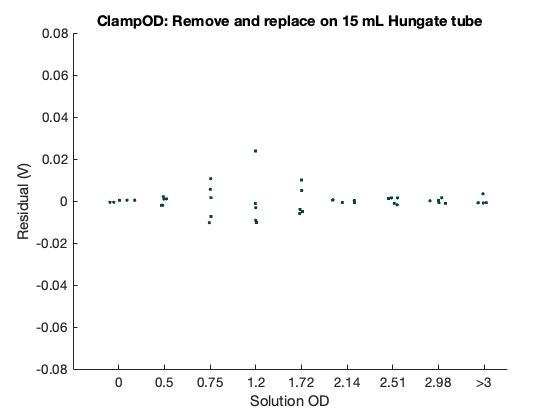

In [8]:
%Residual calculations and plots for ClampOD, remove and replace attempts. 
%Supplimentary Info Figure 1

residuals = [2,4,6,8,10,12,14,16,18, 20, 22];
values = residuals-1;

residual_list2 = glassData(2:6, residuals(1:9));

%%find mean and max difference in mV.
max_residual = max(abs(residual_list2(:)));
mean_residual = mean(abs(residual_list2(:)));
OD_list = reshape(SP(d_list(:,2),2),5,8);
pop_Std = (sum((residual_list2 - mean_residual).^2, 'all')./length(residual_list2))^(0.5);


x_lab(2:9) = string(fix(mean(OD_list).*100)./100);
x_lab(1,1) = '>3';

figure('Name', 'Residual plots for Fixed E. coli Calibrations')
tiledlayout(1,1);

nexttile(1);
hold on
title('ClampOD: Remove and replace on 15 mL Hungate tube')
 swarmchart(repelem(glassData(1,values(1:9)),5),  flip(residual_list2(:)), '.')
solution_OD = [string(round(flip(mean(OD_list)),2)) '>3'];
ylim([-0.08 0.08])
xlim([ 0.001 9.5])
xticklabels(solution_OD)
xlabel('Solution OD')
ylabel('Residual (V)')
%     boxplot(residual_list2)

Set 'VariableNamingRule' to 'preserve' to use the original column headers as table variable names.


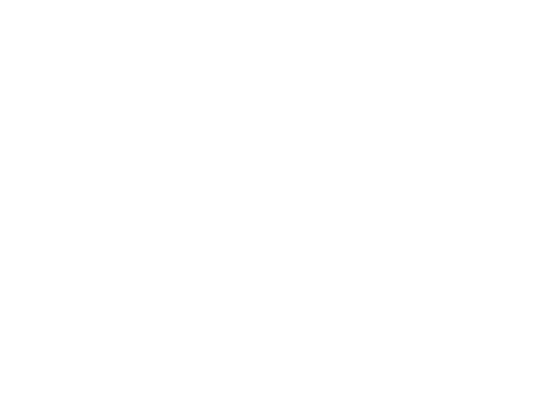

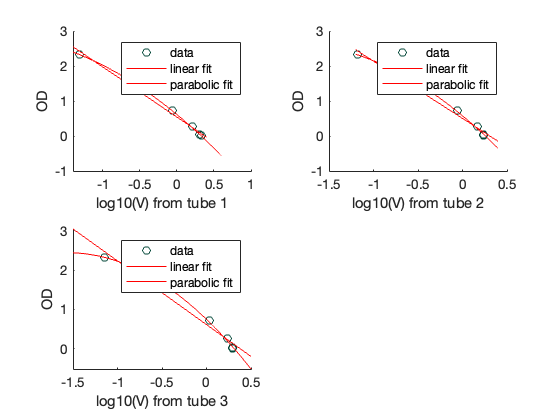

In [6]:
%Calibrations for TubeOD, not included in paper

%Collecting data from LabJack sheets
tubeData = labJack3(:,[1,10:12]);
OD_Data = table2array(readtable('/Users/gcallander/Documents/GitHub/OD-Meter/TubeCal.csv'));

for i = 1: length(tubeData)
    %use only relevant data for the calibration
    if tubeData(i,1) > 3.7105335900E9 && tubeData(i,1) < 3.7105373000E9
        newMatrix(i) = i;
        
    end
end
%%

calSeries(:,1)= tubeData(newMatrix ~= 0,1);
calSeries(:,1) = calSeries(:,1)-calSeries(1,1);
calSeries(:,2) = tubeData(newMatrix ~= 0,2);
calSeries(:,3) = tubeData(newMatrix ~= 0,3);
calSeries(:,4) = tubeData(newMatrix ~= 0,4);

figure('Name', 'Tube calibration')
tiledlayout(3,1)

tubeV_cal = zeros(3,6);
times = [630 990 1380 1830 2220 2640];
%Find average of voltage for each calibration solution
for i = 1: length(calSeries)
    if calSeries(i,1) > 630 && calSeries(i,1) < 870
        calSeries(i,5) = 1;
    elseif calSeries(i,1) > 990 && calSeries(i,1) < 1290
        calSeries(i,5) = 2;
    elseif calSeries(i,1) > 1380 && calSeries(i,1) < 1710
        calSeries(i,5) = 3;
    elseif calSeries(i,1) > 1830 && calSeries(i,1) < 2100
        calSeries(i,5) = 4;
    elseif calSeries(i,1) > 2220 && calSeries(i,1) < 2520
        calSeries(i,5) = 5;
    elseif calSeries(i,1) > 2640 && calSeries(i,1) < 3090
        calSeries(i,5) = 6;
    else
        calSeries(i,5) = 0;
    end
end

for i = 2:4
    for j = 1:6
        tubeV_cal(i-1,j) = sum(calSeries(find(calSeries(:,5) == j),i)./nnz(calSeries(:,5) == j));
    end
end

%% Calibrate against OD
figure("Name", "OD vs. log10(Voltage)")

tiledlayout(3,1)
for i = 1:3
    %using FIT function
    [caltube_curve1, caltube_goodness1, caltube_output1] = fit(log10(tubeV_cal(i,:))',OD_Data(:,1), 'poly1', 'normalize', 'on');
    [caltube_curve2, caltube_goodness2, caltube_output2] = fit(log10(tubeV_cal(i,:))',OD_Data(:,1), 'poly2', 'normalize', 'on');
    
    r_square_caltube(i,1) = caltube_goodness1.rsquare;
    r_square_caltube(i,2) = caltube_goodness2.rsquare;
    
    rmse_caltube(i,1) = caltube_goodness1.rmse;
    rmse_caltube(i,2) = caltube_goodness2.rmse;
    
    hold on
    nexttile(i);
    if i == 2
        title("Calibrating triplicate tubeOD")
    end
    scatter(log10(tubeV_cal(i,:)), OD_Data(:,1))
    hold on
    plot(caltube_curve1)
    plot(caltube_curve2)
    
    str{i} = sprintf("log10(V) from tube %d", i);
    
    xlabel(str(i))
    ylabel("OD")
    legend("data", "linear fit", "parabolic fit")
    hold off
    
end

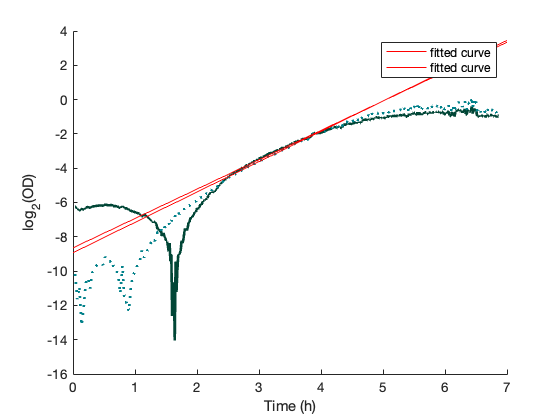

In [14]:
%% Calibrating E. coli
set(0, 'DefaultAxesColorOrder', mapPuBuGn([9,7,5],:))

%manual calibrations

J_EC_ManualCal(:,1)= J_EC_ManualCal(:,2) + J_EC_ManualCal(:,3)./60;
time_OD_hr =  J_EC_ManualCal(:,1);

%J_EC_ClampCalOD - has OD measurements and Volume from dilution

%J_EC_ClampCalV Time and voltage during calibration

%19 points along curve
calJ_EC_VData = zeros(1,5);

for i = 1: length(J_EC_ClampCalV)
    if J_EC_ClampCalV(i,1) > 25836 && J_EC_ClampCalV(i,1) < 25917
        J_EC_ClampCalV(i,5) = 1;
    elseif J_EC_ClampCalV(i,1) > 25951 && J_EC_ClampCalV(i,1) < 26014
        J_EC_ClampCalV(i,5) = 2;
    elseif J_EC_ClampCalV(i,1) > 26121 && J_EC_ClampCalV(i,1) < 26242
        J_EC_ClampCalV(i,5) = 3;
    elseif J_EC_ClampCalV(i,1) > 26298 && J_EC_ClampCalV(i,1) < 26338
        J_EC_ClampCalV(i,5) = 4;
    elseif J_EC_ClampCalV(i,1) > 26402 && J_EC_ClampCalV(i,1) < 26436
        J_EC_ClampCalV(i,5) = 5;
        
    else
        J_EC_ClampCalV(i,5) = 0;
    end
    
end

% Calibrating voltage data
for j = 1:5
    calJ_EC_VData(j) = median(J_EC_ClampCalV(find(J_EC_ClampCalV(:,5) == j),2));
    
end

J_EC_ClampCalOD([2:6],3) = calJ_EC_VData(:);


%Calibration of OD to voltage with 1st and 2nd order polynomial fits

[calJEC_curve1, calJEC_goodness1, calJEC_output1] = fit(-log10(J_EC_ClampCalOD(10:18,3)),J_EC_ClampCalOD(10:18,2), 'poly1', 'normalize', 'on');
[calJEC_curve2, calJEC_goodness2, calJEC_output2] = fit(-log10(J_EC_ClampCalOD(10:18,3)),J_EC_ClampCalOD(10:18,2), 'poly2', 'normalize', 'on');

rsquare1_JEC = calJEC_goodness1.rsquare;
rmse1_JEC = calJEC_goodness1.rmse;
rsquare2_JEC = calJEC_goodness2.rsquare;
rmse2_JEC = calJEC_goodness2.rmse;

%% find median values from voltage data to reduce noise in growth curve

medVolt_JEC = zeros(length(J_EC_Data),1);
time_hr_JEC = zeros(length(J_EC_Data),1);
time_relative_JEC = (J_EC_Data(:,1)-J_EC_Data(1,1))./3600; %convert from s to hours
all_time = (J_EC_Data(:,1)-J_EC_Data(1,1))./3600;
%calculate OD values from formula
for i = 25:length(J_EC_Data)
    %     movingaverage(i) = movmean(CKdata(i,2),[14 15]);
    if (i/25) == round(i/25)
        medVolt_JEC(i) = median(J_EC_Data([i-24:i],2));
        time_hr_JEC(i) = time_relative_JEC(i,1);
    end
    
end
time_hr_JEC = time_hr_JEC(any(time_hr_JEC,2),:);
medVolt_JEC = medVolt_JEC(any(medVolt_JEC,2),:);

OD1fit_JEC = calJEC_curve1(-log10(medVolt_JEC));
OD2fit_JEC = calJEC_curve2(-log10(medVolt_JEC));

%% Calculate growth rates

figure("Name", "E. Coli growth rate")

hold on

%Note dip as OD crosses 0

plot(time_hr_JEC, log2(OD1fit_JEC), 'LineWidth', 2);
plot(time_hr_JEC, log2(OD2fit_JEC), ':', 'LineWidth', 2);

gr_JEC_1 = fit(time_hr_JEC(logical((time_hr_JEC >= 2.5).*(time_hr_JEC <= 4))), log2(OD1fit_JEC(logical((time_hr_JEC >= 2.5).*(time_hr_JEC <= 4)))), 'poly1');
gr_JEC_2 = fit(time_hr_JEC(logical((time_hr_JEC >= 2.5).*(time_hr_JEC <= 4))), log2(OD2fit_JEC(logical((time_hr_JEC >= 2.5).*(time_hr_JEC <= 4)))), 'poly1');

plot(gr_JEC_1)
plot(gr_JEC_2)

xlabel('Time (h)')
ylabel('log_2(OD)')

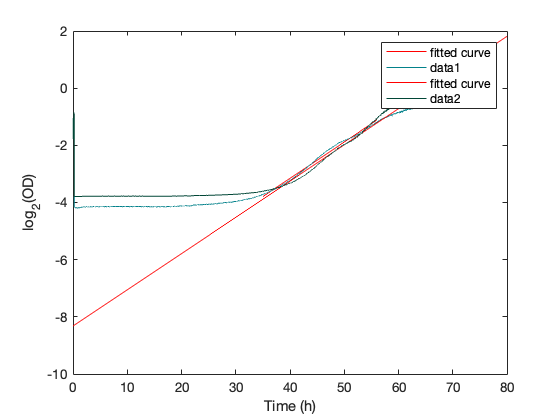

In [15]:
%% Calibrating C. Kluyveri

%% read in data for calibrations
volCal = CKcalibration(:,3);
ODCal = CKcalibration(:,1);
%Fit data only in linear region...
ODCal_lin = CKcalibration([ODCal < 0.5],1);
volCal_lin = CKcalibration([ODCal < 0.5],3);
log10volCal = log10(volCal);

%only linear region fit or parabolic fit
[calCK_curve1, calCK_goodness1, calCK_output1] = fit(-log10(volCal_lin),ODCal_lin, 'poly1', 'normalize', 'on');
[calCK_curve2, calCK_goodness2, calCK_output2] = fit(-log10(volCal),ODCal, 'poly2', 'normalize', 'on');

rsquare1_CK = calCK_goodness1.rsquare;
rmse1_CK = calCK_goodness1.rmse;
rsquare2_CK = calCK_goodness2.rsquare;
rmse2_CK = calCK_goodness2.rmse;


% Transform voltage data to OD measurements (linear OD calibration)

%find median voltage measurements -- every 25 points)
medVolt = zeros(length(CKdata),1);
time_hr = zeros(length(CKdata),1);

%calculate OD values from formula
for i = 25:length(CKdata)
    %     movingaverage(i) = movmean(CKdata(i,2),[14 15]);
    if (i/25) == round(i/25)
        medVolt(i) = median(CKdata([i-24:i],2));
        time_hr(i) = CKdata(i,1)/3600;
    end
    
end

time_hr = time_hr(any(time_hr,2),:);
medVolt = medVolt(any(medVolt,2),:);

%transform medians to OD with fitted line, once with parabolic fit, once with only linear fit

% OD values from linear and parabolic fits
log10V = log10(medVolt);
OD1fit = calCK_curve1(-log10V);
OD2fit = calCK_curve2(-log10V);

%% Growth rate
gr_CK_1 = fit(time_hr(logical((time_hr >= 35).*(time_hr <= 56))), log2(OD1fit(logical((time_hr >= 35).*(time_hr <= 56)))), 'poly1');
gr_CK_2 = fit(time_hr(logical((time_hr >= 35).*(time_hr <= 56))), log2(OD2fit(logical((time_hr >= 35).*(time_hr <= 56)))), 'poly1');

figure("Name", "CK growth rates")
plot(gr_CK_1)

hold on
plot(time_hr, log2(OD1fit))
plot(gr_CK_2)
plot(time_hr, log2(OD2fit))
xlabel('Time (h)')
ylabel('log_2(OD)')

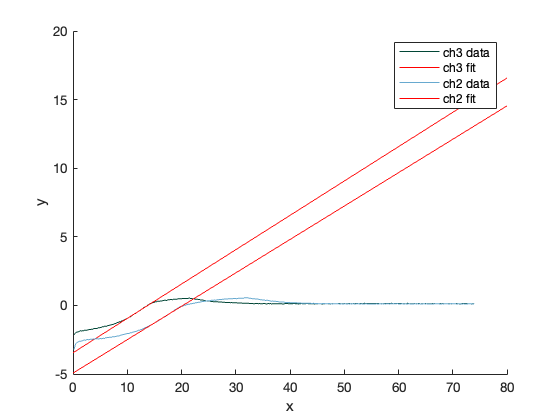

In [16]:
%%T. kivui calibration
cal_tk = Tk_stir(1:10,1:6);

[calTK2_curve1, calTK2_goodness1, calTK2_output1] = fit(-log10(cal_tk(:,2)), cal_tk(:,5), 'poly1', 'normalize', 'on');
[calTK3_curve1, calTK3_goodness1, calTK3_output1] = fit(-log10(cal_tk(:,3)), cal_tk(:,6), 'poly1', 'normalize', 'on');

rsquare_TK(2) = calTK2_goodness1.rsquare;
rmse_TK(2) = calTK2_goodness1.rmse;
rsquare_TK(3) = calTK3_goodness1.rsquare;
rmse_TK(3) = calTK3_goodness1.rmse;

%% Transform T. kivui stir data to OD growth curve

%3. Reduce noise by finding median of 25 points at a time (~ 1 point every 2
%min)

time_tkstir = Tk_stir(:,7)-Tk_stir(1,7);
medVolt_tkstir = zeros(length(time_tkstir),3);
time_hr_tkstir_all = zeros(length(time_tkstir),1);

%calculate OD values from formula
for i = 25:length(time_tkstir)
    if (i/25) == round(i/25)
        medVolt_tkstir(i,1) = median(Tk_stir([i-24:i],8));
        medVolt_tkstir(i,2) = median(Tk_stir([i-24:i],9));
        medVolt_tkstir(i,3) = median(Tk_stir([i-24:i],10));
        time_hr_tkstir_all(i) = time_tkstir(i)/3600;
    end
    
    
end
time_hr_tkstir = time_hr_tkstir_all(any(time_hr_tkstir_all,2),:);
medVolt_tkstir = medVolt_tkstir(any(medVolt_tkstir,2),:);

%% transform to OD
OD_ch2fit_tkstir = calTK2_curve1(-log10(medVolt_tkstir(:,2)));
OD_ch3fit_tkstir = calTK3_curve1(-log10(medVolt_tkstir(:,3)));


%% Kivui - Growth rate calculations
gr_TK_3 = fit(time_hr_tkstir(logical((time_hr_tkstir >= 9.5).*(time_hr_tkstir <= 14))), log2(OD_ch3fit_tkstir(logical((time_hr_tkstir >= 9.5).*(time_hr_tkstir <= 14)))), 'poly1');
gr_TK_2 = fit(time_hr_tkstir(logical((time_hr_tkstir >= 14).*(time_hr_tkstir <= 18.5))), log2(OD_ch2fit_tkstir(logical((time_hr_tkstir >= 14).*(time_hr_tkstir <= 18.5)))), 'poly1');

figure("Name", "TK growth rates")
hold on

plot(time_hr_tkstir, log2(OD_ch3fit_tkstir))
plot(gr_TK_3)
plot(time_hr_tkstir, log2(OD_ch2fit_tkstir))
plot(gr_TK_2)
legend("ch3 data", "ch3 fit", "ch2 data", "ch2 fit")
xlabel('Time (h)')
ylabel('log_2(OD)')


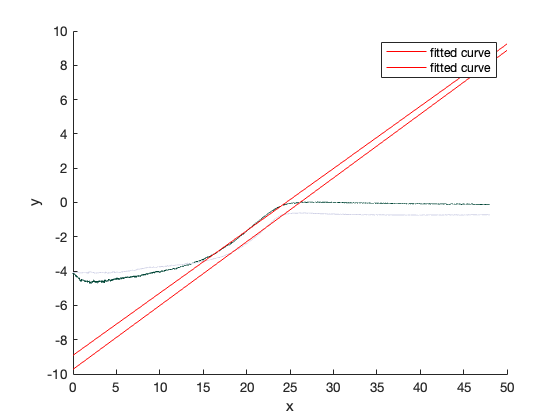

In [16]:
%%L. lactis calibration
lac_cal_averages = lac_cal(:, [5,9, 12, 13]);
lac_time = lac_gc(:,[2,5]);
lac_voltage = lac_gc(:,[3,6]);

[calLacMut_curve2, calLacMut_goodness2, calLacMut_output2] = fit(-log10(lac_cal_averages(:,2)), lac_cal_averages(:,1), 'poly2', 'normalize', 'on');
[calLacMut_curve1, calLacMut_goodness1, calLacMut_output1] = fit(-log10(lac_cal_averages(:,2)), lac_cal_averages(:,1), 'poly1', 'normalize', 'on');

rsquare1_LacMut = calLacMut_goodness1.rsquare;
rmse1_LacMut = calLacMut_goodness1.rmse;
rsquare2_LacMut = calLacMut_goodness2.rsquare;
rmse2_LacMut = calLacMut_goodness2.rmse;

[calLacWT_curve2, calLacWT_goodness2, calLacWT_output2] = fit(-log10(lac_cal_averages(1:5,4)), lac_cal_averages(1:5,3), 'poly2', 'normalize', 'on');
%fit to linear region
[calLacWT_curve1, calLacWT_goodness1, calLacWT_output1] = fit(-log10(lac_cal_averages(1:5,4)), lac_cal_averages(1:5,3), 'poly1', 'normalize', 'on');

rsquare1_LacWT = calLacWT_goodness1.rsquare;
rmse1_LacWT = calLacWT_goodness1.rmse;
rsquare2_LacWT = calLacWT_goodness2.rsquare;
rmse2_LacWT = calLacWT_goodness2.rmse;


%Fit data with OD

[gc1_lacmut] = calLacMut_curve1(-log10(lac_voltage(:,2)));
[gc1_lacwt] = calLacWT_curve1(-log10(lac_voltage(:,1)));

[gc2_lacmut] = calLacMut_curve2(-log10(lac_voltage(:,2)));
[gc2_lacwt] = calLacWT_curve2(-log10(lac_voltage(:,1)));

lac_time_mut = lac_time(:,2);
lac_time_wt =lac_time(:,1);
gr_lac_mut = fit(lac_time_mut(logical((lac_time_mut >= 15).*(lac_time_mut <= 22))), log2(gc1_lacmut(logical((lac_time_mut >= 15).*(lac_time_mut <= 22)))), 'poly1');
gr_lac_wt = fit(lac_time_wt(logical((lac_time_wt >= 17).*(lac_time_wt <= 24))), log2(gc1_lacwt(logical((lac_time_wt >= 17).*(lac_time_wt <= 24)))), 'poly1');

figure("Name", "lac growth rates")
hold on

plot(lac_time_mut, log2(gc1_lacmut))
plot(lac_time_wt, log2(gc1_lacwt))
plot(gr_lac_wt)
plot(gr_lac_mut)
xlabel('Time (h)')
ylabel('log_2(OD)')

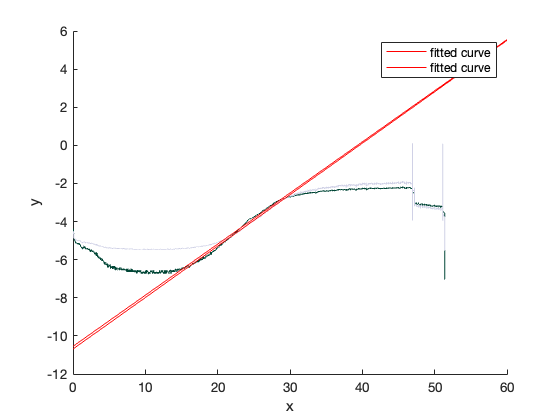

In [15]:
%% M. maripaludis calibration

met_cal = met_data([2:9], [5,6]);
%Find voltages
met_cal(:,3) = 10.^-met_cal(:,2); %or -10^V?
met_cal(:,4) = repelem(1,8);
met_gc = met_data(:,[1,2]);

medVolt_met = zeros(length(met_gc),1);
time_hr_met = zeros(length(met_gc),1);

%calculate OD values from formula
for i = 5:length(met_gc)
    if (i/25) == round(i/25)
        medVolt_met(i) = median(met_gc([i-24:i],2));
        time_hr_met(i) = met_gc(i,1)/3600;
    end
end
time_hr_met = time_hr_met(any(time_hr_met,2),:);
medVolt_met = -medVolt_met(any(medVolt_met,2),:);

%x = log10(V), y = OD
[calMet_curve2, calMet_goodness2, calMet_output2] = fit(met_cal(:,2), met_cal(:,1), 'poly2', 'normalize', 'on');
%fit to linear region
[calMet_curve1, calMet_goodness1, calMet_output1] = fit(met_cal([2:8],2), met_cal([2:8],1), 'poly1', 'normalize', 'on');

rsquare1_Met = calMet_goodness1.rsquare;
rmse1_Met = calMet_goodness1.rmse;
rsquare2_Met = calMet_goodness2.rsquare;
rmse2_Met = calMet_goodness2.rmse;


%Fit data with OD
[gc_met_fit] = calMet_curve1(-log10(medVolt_met));
[gc_met_fit2] = calMet_curve2(-log10(medVolt_met));

gr_mm_1 = fit(time_hr_met(logical((time_hr_met >= 21).*(time_hr_met <= 30))), log2(gc_met_fit(logical((time_hr_met >= 21).*(time_hr_met <= 30)))), 'poly1');
gr_mm_2 = fit(time_hr_met(logical((time_hr_met >= 21).*(time_hr_met <= 30))), log2(gc_met_fit2(logical((time_hr_met >= 21).*(time_hr_met <= 30)))), 'poly1');

figure("Name", "mm growth rates")

hold on

plot(time_hr_met, log2(gc_met_fit))
plot(time_hr_met, log2(gc_met_fit2))
plot(gr_mm_1)
plot(gr_mm_2)
xlabel('Time (h)')
ylabel('log_2(OD)')

In [ ]:
%%Example for growth curve process, 
%%Main text, figure 2

figure("Name", "Data processing")
tiledlayout(1,3)
set(gcf,'color','w');
set(gca, 'FontSize', 14);
map2 = brewermap(9,'OrRd');
map = brewermap(9, 'PuOr');
set(0, 'DefaultAxesColorOrder', map([9,3,1],:))

nexttile(1);
hold on
% title(figurecaptions(1),'FontSize',13,'position',[-5 2.2 0])
% scatter(lac_time(:,2),lac_voltage(:,2))
scatter(lac_time(:,1),lac_voltage(:,1))
legend("Mutant","WT")
legend hide
xlabel("Time (h)",'FontSize', 14)
ylabel("Voltage (V)", 'FontSize', 14, 'color', map(9,:))
xlim([0 48])
ax = gca;
set(ax,'xticklabel',[])
set(ax,'yticklabel',[])
ax.Box = 'on';
ax.FontSize = 12;
pbaspect([1 1 1])


nexttile(2);
hold on
% title(figurecaptions(2),'FontSize',13,'position',[-0.5 0.6 0])
% scatter(-log10(lac_cal_averages(:,2)),lac_cal_averages(:,1),'filled' )
scatter(-log10(lac_cal_averages(:,4)), lac_cal_averages(:,3), 'filled')
p1 = plot(calLacWT_curve1, ':');
% m1 = plot(calLacMut_curve1, ':');

% p2 = plot(calLacWT_curve2);
set(p1, 'color', map2(7,:), 'LineWidth', 2)
% set(m1, 'color', map(8,:), 'LineWidth', 2)
legend("Mutant","", "WT", "")
legend hide
ylabel("Measured OD", 'FontSize', 14, 'color', map2(5,:))
xlabel("-log_1_0(Voltage)", 'FontSize', 14, 'color', map(9,:))
% ylim([0 1.3])
h = get(gca,'Children');
set(gca,'Children',[ h(2) h(1)])
ax = gca;
set(ax,'xticklabel',[])
set(ax,'yticklabel',[])
ax.Box = 'on';
pbaspect([1 1 1])

hold off

nexttile(3);
hold on
xlabel("Time (h)", 'FontSize', 14)
ylabel("Calculated OD", 'FontSize', 14, 'color', map2(7,:))
% m1 = plot(lac_time(:,2), gc1_lacmut);
w1 = plot(lac_time(:,1), gc1_lacwt, ':');
% m2 = plot(lac_time(:,2), gc2_lacmut);
% w2 = plot(lac_time(:,1), gc2_lacwt);
% set(m2,  'LineWidth', 2)
% set(m1, 'color', map(8,:), 'LineWidth', 2)
% set(w2, 'color', [0.4940, 0.1840, 0.5560])
set(w1, 'color', map2(7,:),'LineWidth', 2)

% set(p1, 'color', map(1,:), 'LineWidth', 2)
% set(m1, 'color', map(8,:), 'LineWidth', 2)
% title(figurecaptions(3),'FontSize',13,'position',[-5 0.6 0])
xlim([0 48])
% ylim([0 1.3])
ax = gca;
set(ax,'xticklabel',[])
set(ax,'yticklabel',[])
ax.Box = 'on';
pbaspect([1 1 1])


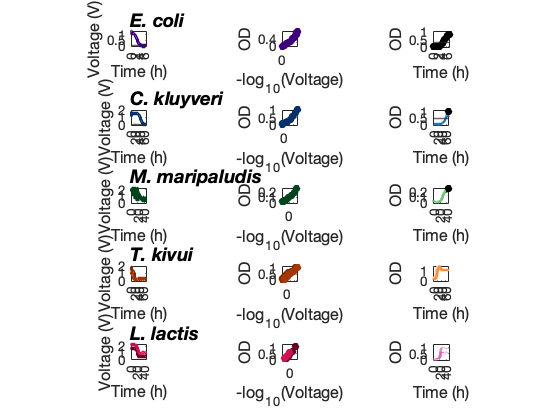

In [17]:
%% Growth curves
%% Main text, figure 4
f = figure("Name","GC_ALL");
map = brewermap(9,'PRGn');
set(gcf,'units','centimeters','position',[0 0 18 14])
% set(gca, 'FontSize', 14);
set(gcf,'color','w');


t = tiledlayout(5,3, 'Padding', 'loose', 'TileSpacing','compact');

%E. Coli

set(0, 'DefaultAxesColorOrder', mapPurple([9,7,5],:)) % first three rows

nexttile(1);

hold on

scatter(all_time, J_EC_Data(:,2), 5)
yline(10^(-((2.5/8)-calJEC_curve1.p2)/calJEC_curve1.p1), '-','LineWidth', 1 )

xlim([0 7])
xticks([0:2:10])

ax = gca;
ax.Box = 'on';
pbaspect([1 1 1])
ttl = title("E. coli", 'FontAngle','italic', 'FontSize', 14);
ttl.Units = 'Normalize';
ttl.Position(1) = 0; % use negative values (ie, -0.1) to move further left
ttl.HorizontalAlignment = 'left';

nexttile(2);
hold on

scatter(-log10(J_EC_ClampCalOD(2:18,3)), J_EC_ClampCalOD(2:18,2), 'filled');
p1 = plot(calJEC_curve1, ':');
p2 = plot(calJEC_curve2, '-');

legend hide
set(p2, 'LineWidth', 2)
set(p1, 'LineWidth', 2)

h = get(gca,'Children');
set(gca,'Children',[ h(3) h(1) h(2)], 'xlabel', [])
set(gca, 'ylabel', [])
ax = gca;
ax.Box = 'on';
pbaspect([1 1 1])

nexttile(3)

hold on
p4 = scatter((time_OD_hr), J_EC_ManualCal(:,4), [], mapGrey(9,:), 'filled');
p1 = plot(time_hr_JEC, OD1fit_JEC, 'LineWidth', 2);
p2 = plot(time_hr_JEC,OD2fit_JEC, 'LineWidth', 2);

p3 = yline(2.5/8, '-','LineWidth', 1);

ax = gca;
ax.Box = 'on';
pbaspect([1 1 1])

xlim([0 7])
xticks([0:2:10])

h = get(gca,'Children');
set(gca,'Children',[h(4) h(2) h(3)  h(1)])

hold off

%C. kluyveri

map = mapBlue;
set(0, 'DefaultAxesColorOrder', map([9,7,5],:)) % first three rows

nexttile(4);

hold on

scatter(CKdata(300:end,1)./3600, CKdata(300:end,2), 5)
yline(10^(-((2.5/5.13)-calCK_curve1.p2)/calCK_curve1.p1), 'LineWidth', 1)

xlim([0 70])
xticks([0:20:60])
ax = gca;
ax.Box = 'on';
pbaspect([1 1 1])
ttl = title(["C. kluyveri"] , 'FontAngle','italic', 'FontSize', 14);
ttl.Units = 'Normalize';
ttl.Position(1) = 0; % use negative values (ie, -0.1) to move further left
ttl.HorizontalAlignment = 'left';
hold off

nexttile(5);

hold on

scatter(-log10volCal,ODCal, 'filled')
p1 = plot(calCK_curve1, ':');
p2 = plot(calCK_curve2);
legend("data","linear fit", "parabolic fit")
legend hide

set(p2, 'color', map(5,:), 'LineWidth', 2)
set(p1, 'color', map(7,:), 'LineWidth', 2)


h = get(gca,'Children');
set(gca,'Children',[ h(3) h(1) h(2)], 'xlabel', [])
ax = gca;
ax.Box = 'on';
pbaspect([1 1 1])


nexttile(6);


hold on

p2 = plot(time_hr(30:end),OD2fit(30:end));
p1 = plot(time_hr(30:end), OD1fit(30:end));
set(p2, 'color', map(5,:), 'LineWidth', 2)
set(p1, 'color', map(7,:), 'LineWidth', 2)
yline(2.5/5.13, 'LineWidth', 1)
scatter(69,ODCal(1), [], mapGrey(9,:), "filled")

legend("parabolic fit", "linear fit", "Calibration bounds")
legend hide

xlim([0 70])
xticks([0:20:60])

ax = gca;
ax.Box = 'on';
pbaspect([1 1 1])

hold off

%M. maripaludis

map = mapGreen;
set(0, 'DefaultAxesColorOrder', map([9,7,5],:)) % first three rows

nexttile(7);

hold on

ttl = title(["M. maripaludis"], 'FontAngle','italic', 'FontSize', 14);
ttl.Units = 'Normalize';
ttl.Position(1) = 0; % use negative values (ie, -0.1) to move further left
ttl.HorizontalAlignment = 'left';

scatter(met_data(300:end,1)./3600, -met_data(300:end,2), 5)
xlim([0 45])
ax = gca;
ax.Box = 'on';
pbaspect([1 1 1])
xticks([0:20:60])

hold off

nexttile(8);

hold on
scatter(met_cal(:,2),met_cal(:,1), 'filled')
n1 = plot(calMet_curve1, ':');
n2 = plot(calMet_curve2, '-');
xlim([-0.35 0.4])
set(n1, 'color', map(7,:), 'LineWidth', 2)
set(n2, 'color', map(5,:), 'LineWidth', 2)

legend("calibration data", "1st order", "2nd order")
legend hide

h = get(gca,'Children');
set(gca,'Children', [h(3) h(1) h(2)], 'xlabel', [])
ax = gca;
ax.Box = 'on';
pbaspect([1 1 1])

hold off

nexttile(9);

hold on
xlim([0 45])
scatter(45, 0.268, [], mapGrey(9,:), 'filled')
plot(time_hr_met, gc_met_fit, 'color', map(7,:),'LineWidth', 2)
plot(time_hr_met, gc_met_fit2,  'color', map(5,:),'LineWidth', 2)

legend("1st order", "2nd order")
legend hide

h = get(gca,'Children');
set(gca,'Children',[h(3) h(1) h(2)])

ax = gca;
ax.Box = 'on';
pbaspect([1 1 1])
xticks([0:20:60])

hold off

% T. kivui

map = mapOrange;

set(0, 'DefaultAxesColorOrder', map([9,8,7,5],:)) % first three rows
nexttile(10);
hold on
scatter(time_tkstir./3600, Tk_stir(:,9), 5)
scatter(time_tkstir./3600, Tk_stir(:,10), 5)
legend("ch1","ch2")
legend hide
ttl = title("T. kivui", 'FontAngle','italic', 'FontSize', 14);
ttl.Units = 'Normalize';
ttl.Position(1) = 0; % use negative values (ie, -0.1) to move further left
ttl.HorizontalAlignment = 'left';

xlim([0 75])
xticks([0:20:60])

ax = gca;
ax.Box = 'on';
pbaspect([1 1 1])

hold off

nexttile(11);

hold on

s1 = scatter(-log10(cal_tk(:,2)), cal_tk(:,5), 'filled');
s2 = scatter(-log10(cal_tk(:,3)), cal_tk(:,6), 'filled');
ch1 = plot(calTK2_curve1, ':');
ch2 = plot(calTK3_curve1, '--');

set(ch2, 'color', map(3,:), 'LineWidth', 2)
set(ch1, 'color', map(5,:), 'LineWidth', 2)
legend("Ch1","", "Ch2", "")
legend hide

h = get(gca,'Children');
set(gca,'Children',[ h(3) h(4) h(2) h(1)], 'xlabel', [])

pbaspect([1 1 1])
ax = gca;
ax.Box = 'on';

hold off


nexttile(12);

hold on

xticks([0:20:60])

ch2 = plot(time_hr_tkstir, OD_ch3fit_tkstir);
ch1 = plot(time_hr_tkstir, OD_ch2fit_tkstir);

set(ch1, 'color', map(5,:), 'LineWidth', 2)
set(ch2, 'color', map(3,:),'LineWidth', 2)
xlim([0 75])

ax = gca;
ax.Box = 'on';
pbaspect([1 1 1])

hold off

%L. lactis

map = mapPuRd;
set(0, 'DefaultAxesColorOrder', map([9,7,5,3],:)) % first three rows

nexttile(13);

hold on
s1 = scatter(lac_time(:,2),lac_voltage(:,2), 5);
s2 = scatter(lac_time(:,1),lac_voltage(:,1), 5);

legend("Mutant","WT")
legend hide
ttl = title("L. lactis", 'FontAngle','italic', 'FontSize', 14);

ttl.Units = 'Normalize';
ttl.Position(1) = 0; % use negative values (ie, -0.1) to move further left
ttl.HorizontalAlignment = 'left';

xlim([0 48])
xticks([0:20:60])
ax = gca;
ax.Box = 'on';
pbaspect([1 1 1])

nexttile(14);
hold on
scatter(-log10(lac_cal_averages(:,2)),lac_cal_averages(:,1),'filled' )
scatter(-log10(lac_cal_averages(:,4)), lac_cal_averages(:,3), 'filled')
w1 = plot(calLacWT_curve1, '--');
m1 = plot(calLacMut_curve1, ':');

set(w1, 'color', map(5,:), 'LineWidth', 2)
set(m1, 'color', map(4,:), 'LineWidth', 2)
legend("Mutant","", "WT", "")
legend hide
ylim([0 1.3])

h = get(gca,'Children');
set(gca,'Children',[ h(3) h(4) h(2) h(1)])
ax = gca;
ax.Box = 'on';
pbaspect([1 1 1])

hold off

nexttile(15);

hold on

m1 = plot(lac_time(:,2), gc1_lacmut);
w1 = plot(lac_time(:,1), gc1_lacwt);

set(m1, 'color', map(4,:), 'LineWidth', 2)
set(w1, 'color', map(5,:),'LineWidth', 2)

xlim([0 48])
xticks([0:20:60])

ylim([0 1.3])
ax = gca;
pbaspect([1 1 1])

ax.Box = 'on';
ax = findobj(f,'Type','Axes');

for i=[3,6,9,12,15]
    
    xlabel(ax(i),{['Time (h)']},'FontSize', 12)
    ylabel(ax(i),{'Voltage (V)'},'FontSize', 12)
    
end

for i=[2,5,8,11,14]
    
    ylabel(ax(i),{'OD'},'FontSize', 12)
    xlabel(ax(i),{'-log_1_0(Voltage)'},'FontSize', 12)
    
end

for i=[1,4,7,10,13]
    
    ylabel(ax(i),{'OD'}, 'FontSize', 12)
    xlabel(ax(i),{'Time (h)'},'FontSize', 12)
    
end